# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random

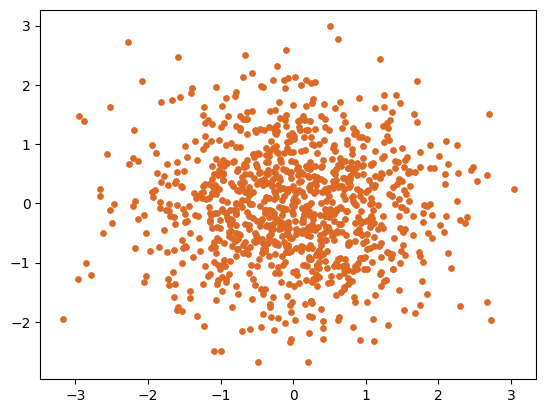

In [163]:
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y, color='#dd6926', s=15)


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


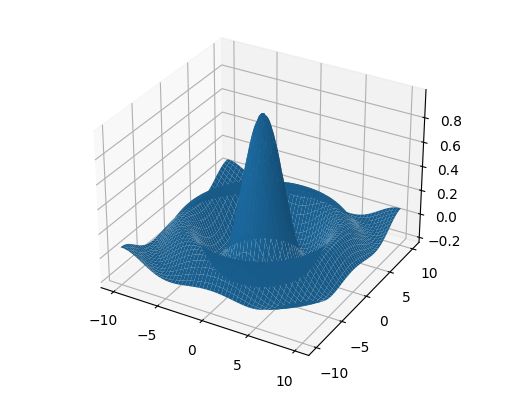

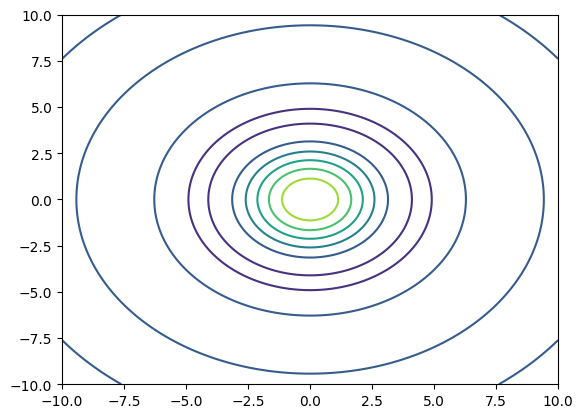

In [192]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots()
x, y = np.linspace(-10,10,500), np.linspace(-10, 10,500)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))/np.sqrt(X**2 + Y**2)

ax.axis("off")
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)


fig, ax = plt.subplots()
cnt = plt.contour(X, Y, Z)



3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


Text(0, 0.5, 'Osa y')

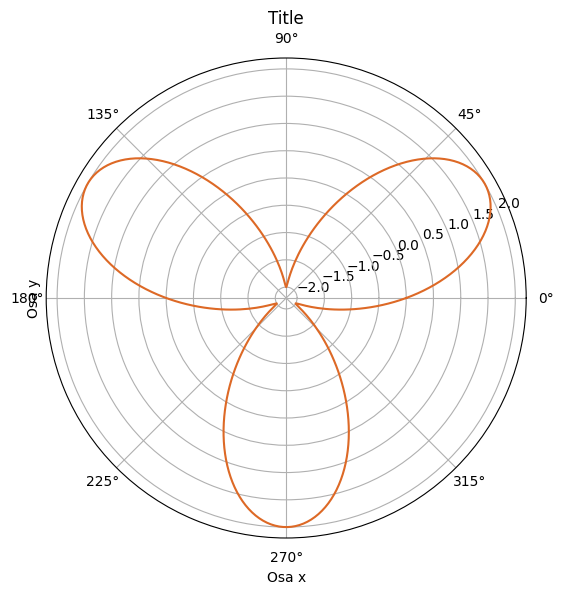

In [170]:
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, 1, 1], polar=True)
x = np.linspace(0, 2 * np.pi, 350)
y = 2 * np.sin(3 * x)
ax.plot(x,y, color='#dd6926')
ax.set_title("Title")
ax.set_xlabel("Osa x")
ax.set_ylabel("Osa y")



4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


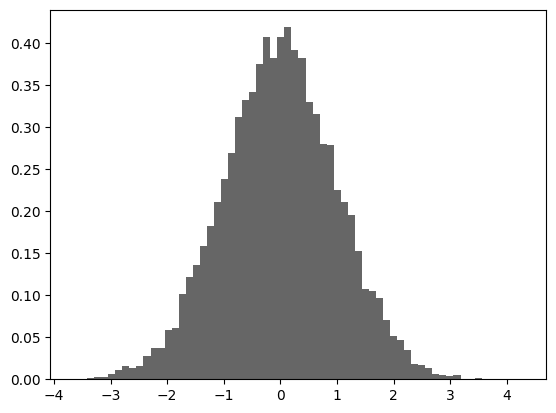

In [171]:
from scipy import stats
fig, ax = plt.subplots(1,1)
r = stats.norm.rvs(size=10000)
ax.hist(r, density=True, bins='auto', alpha=0.6, color='black')
plt.show()


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


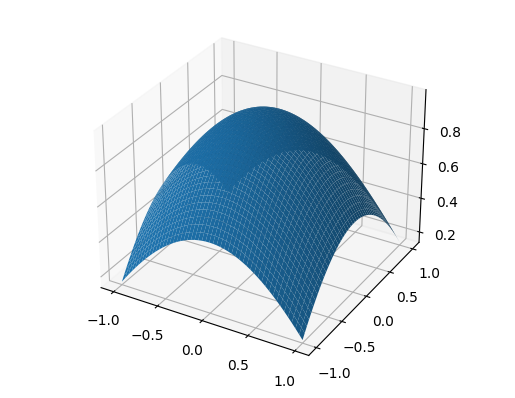

In [179]:
fig, ax = plt.subplots()
ax.axis("off")
x, y = np.linspace(-1, 1, 500), np.linspace(-1, 1, 500)
X, Y = np.meshgrid(x, y)
Z = np.cos(np.sqrt(X**2 + Y**2))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

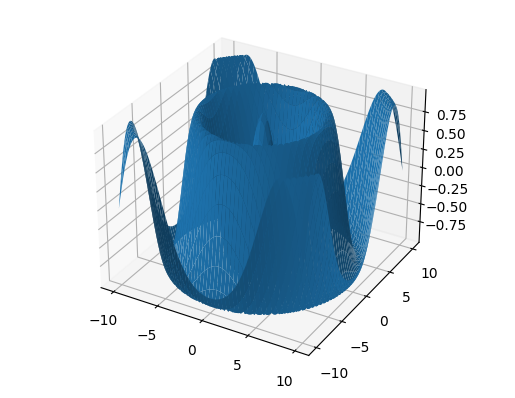

In [180]:
fig, ax = plt.subplots()
ax.axis("off")
x, y = np.linspace(-10, 10, 500), np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
Z = np.cos(np.sqrt(X**2 + Y**2))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

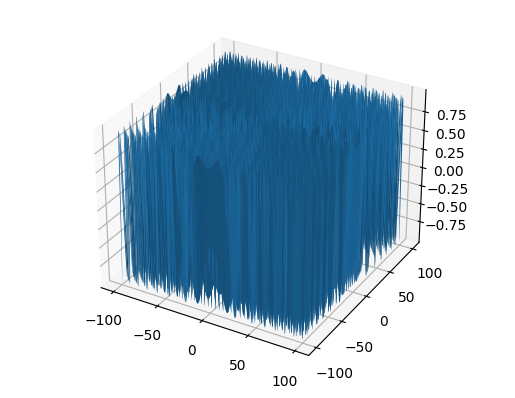

In [181]:
fig, ax = plt.subplots()
ax.axis("off")
x, y = np.linspace(-100, 100, 500), np.linspace(-100, 100, 500)
X, Y = np.meshgrid(x, y)
Z = np.cos(np.sqrt(X**2 + Y**2))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [122]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

In [123]:

def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2)) # matice rozšířená o okraj
    number_of_circles = (n - 1) // 2 # počet kruhů okolo středu s jedničkou
    pos_row = n // 2 + 1  # počáteční pozice: střed matice
    pos_col = n // 2 + 1
    A[pos_row, pos_col] = 1
    pos_row -= 1  # posun pozice nahoru pro pokračování spirály
    current_number = 2 # aktuální číslo, které se má vložit

    for i in range(number_of_circles):
        length_of_side = 2 * (i + 1) # délka strany (bez rohu)
        # horní hrana
        A[pos_row, pos_col:pos_col-length_of_side:-1] = np.arange(current_number, current_number + length_of_side)
        current_number += length_of_side # přičteme délku strany k aktuálnímu číslu
        pos_col -= length_of_side - 1 # index sloupce pro levou hranu je velikost hrany - 1 
        pos_row += 1 # levou hranu začínáme o řádek níž
        # levá hrana
        A[pos_row:pos_row+length_of_side, pos_col] = np.arange(current_number, current_number + length_of_side)
        current_number += length_of_side  # přičteme délku strany k aktuálnímu číslu
        pos_row += length_of_side - 1 # index řádku pro dolní hranu je velikost hrany - 1
        pos_col += 1 # dolní hranu začínáme o sloupec vpravo
        # dolní hrana
        A[pos_row, pos_col:pos_col+length_of_side] = np.arange(current_number, current_number + length_of_side)
        current_number += length_of_side  # přičteme délku strany k aktuálnímu číslu
        pos_col += length_of_side - 1 # index sloupce pro pravou hranu je velikost hrany - 1
        pos_row -= 1 # pravou hranu začínáme o řádek výše
        # pravá hrana
        A[pos_row:pos_row-length_of_side:-1, pos_col] = np.arange(current_number, current_number + length_of_side)
        current_number += length_of_side  # přičteme délku strany k aktuálnímu číslu
        pos_row -= length_of_side # index řádku pro horní hranu je velikost hrany (sloupec se nemění)
    
    return A[1:-1, 1:-1]  # ořízneme nulový okraj


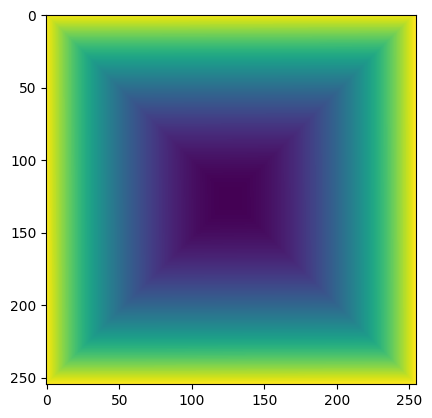

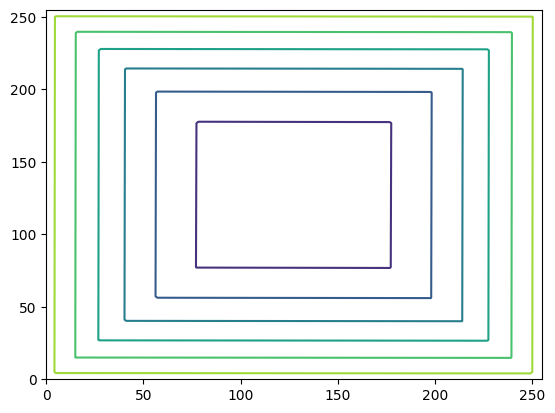

In [195]:
M = integer_spiral_numpy(255)
plt.imshow(M)
plt.figure()
x, y = np.linspace(0, M.shape[0], M.shape[0]), np.linspace(0, M.shape[1], M.shape[1])
X, Y = np.meshgrid(x, y)
Z = M
plt.contour(X, Y, Z)

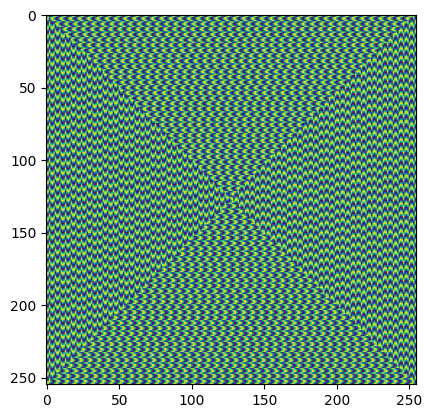

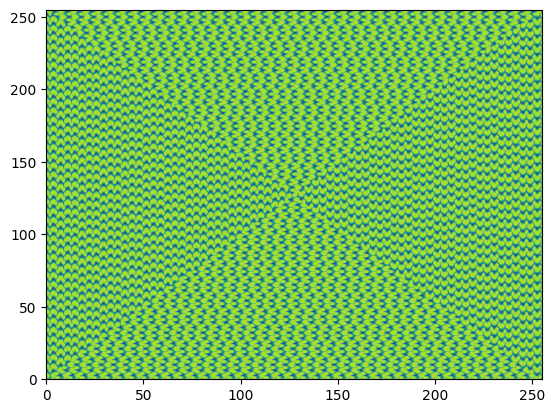

In [196]:
plt.figure()
M = np.sin(M)
plt.imshow(M)
plt.figure()
x, y = np.linspace(0, M.shape[0], M.shape[0]), np.linspace(0, M.shape[1], M.shape[1])
X, Y = np.meshgrid(x, y)
Z = M
plt.contour(X, Y, Z)

(<matplotlib.legend.Legend at 0x7f6e64856bf0>, None)

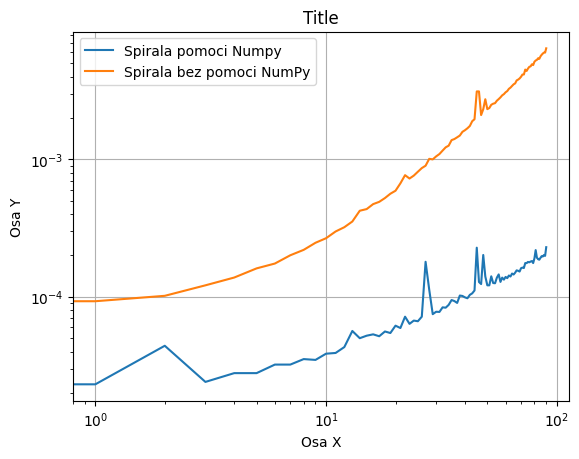

In [201]:
import time
spiral_arr = []
np_spiral_arr = []
spiral_arr = []
for i in range(11,102):
    start = time.time()
    integer_spiral(i)
    end = time.time()
    spiral_arr.append(end - start)
    start = time.time()
    integer_spiral_numpy(i)
    end = time.time()
    np_spiral_arr.append(end - start)

fig, ax = plt.subplots()
ax.set_title("Title"), ax.set_xscale("log"), ax.set_yscale("log"), ax.set_xlabel("Osa X"), ax.set_ylabel("Osa Y")
ax.plot(np_spiral_arr, label='Spirala pomoci Numpy')
ax.plot(spiral_arr, label='Spirala bez pomoci NumPy')
ax.legend(), ax.grid()

Spirála pomocí NumPy má menší časovou náročnost oproti spirále druhé.

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.